## 1. Load Library

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [161]:
# load dataset using pandas read_csv() method
data_path = pd.read_csv('./dataset/Credit card.csv', usecols=['City', 'Date', 'Card Type','Exp Type','Gender',	'Amount'])
data = pd.DataFrame(data_path)
data.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


## 3. Sneak Peek Dataset

In [224]:
# displays the columns/labels in the dataset
data.columns

Index(['City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount', 'Year',
       'Month', 'Day'],
      dtype='object')

In [223]:
# displays the shape / dimensions of the dataset
data.shape

(26052, 9)

In [225]:
# displays the data type in each column/label
data.dtypes

City                 object
Date         datetime64[ns]
Card Type            object
Exp Type             object
Gender               object
Amount                int64
Year                  int64
Month                object
Day                  object
dtype: object

In [226]:
# displays the number of unique characters in each column/label
data.nunique()

City           986
Date           600
Card Type        4
Exp Type         6
Gender           2
Amount       24972
Year             3
Month           12
Day              7
dtype: int64

In [227]:
# displays dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
 6   Year       26052 non-null  int64         
 7   Month      26052 non-null  object        
 8   Day        26052 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.8+ MB


In [228]:
# checks whether there are empty data / missing values
data.isna().values.any()

False

In [168]:
data[data.duplicated()]

,City,Date,Card Type,Exp Type,Gender,Amount


In [229]:
# displays the descriptive statistics of the dataset
data.describe()

,Amount,Year
count,26052.000000,26052.000000
mean,156411.537425,2014.092392
std,103063.254287,0.620761
min,1005.000000,2013.000000
25%,77120.250000,2014.000000
50%,153106.500000,2014.000000
75%,228050.000000,2014.000000
max,998077.000000,2015.000000


## 4. EDA (Exploratory Data Analysis)

In [231]:
# create new columns for 'Year', 'Month', 'Day', using the pandas to_datetime() method
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda time: time.year)
data['Month'] = data['Date'].apply(lambda time: time.month)
data['Day'] = data['Date'].apply(lambda time: time.dayofweek)

# mapping for the 'Month' and 'Day' columns to be more specific
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Month'] = data['Month'].map(mon)
data['Day'] = data['Day'].map(day)
data

,City,Date,Card Type,Exp Type,Gender,Amount,Year,Month,Day
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014,Oct,Wed
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014,Aug,Fri
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014,Aug,Wed
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014,Apr,Sat
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015,May,Tue
...,...,...,...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191,2014,Jun,Sun
26048,"Pune, India",2014-08-03,Signature,Travel,M,246316,2014,Aug,Sun
26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019,2015,Jan,Fri
26050,"Kanpur, India",2014-09-14,Silver,Travel,M,88174,2014,Sep,Sun


<AxesSubplot:xlabel='count', ylabel='Exp Type'>

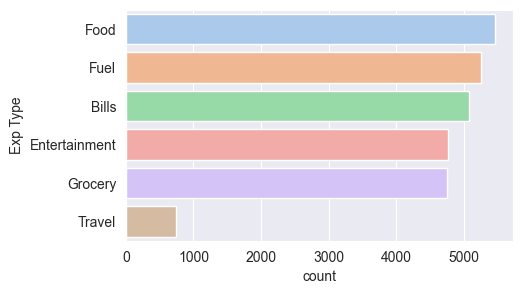

In [239]:
# visualization the distribution of expenditure
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')
sns.countplot(y=data['Exp Type'],data=data, palette='pastel',order=data['Exp Type'].value_counts().index[:6])

 
Food:  5463
Fuel:  5257
Bills:  5078
Entertainment:  4762
Grocery:  4754
Travel:  738
 


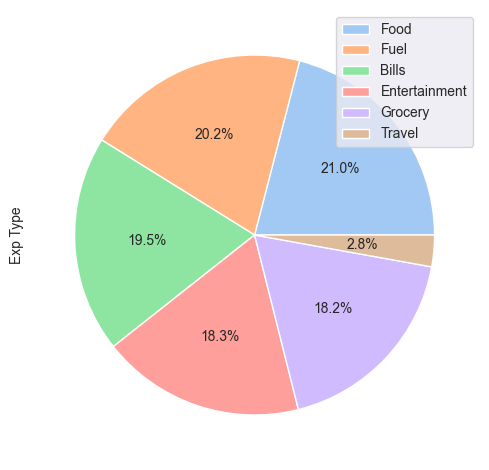

In [240]:
colors = sns.color_palette('pastel')
data['Exp Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors,labels=None, legend=True)
plt.tight_layout()

print(" ")
print('Food: ', (data['Exp Type'] == 'Food').sum())
print('Fuel: ', (data['Exp Type'] == 'Fuel').sum())
print('Bills: ', (data['Exp Type'] == 'Bills').sum())
print('Entertainment: ', (data['Exp Type'] == 'Entertainment').sum())
print('Grocery: ', (data['Exp Type'] == 'Grocery').sum())
print('Travel: ', (data['Exp Type'] == 'Travel').sum())
print(" ")

 
Female:  13680
Male:  12372
 


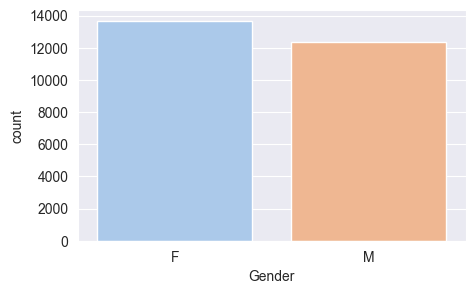

In [233]:
# gender distribution
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='Gender', palette='pastel')
print(" ")
print('Female: ', (data['Gender'] == 'F').sum())
print('Male: ', (data['Gender'] == 'M').sum())
print(" ")

 
Silver:  6840
Gold:  6367
Platinum:  6398
Signature:  6447
 


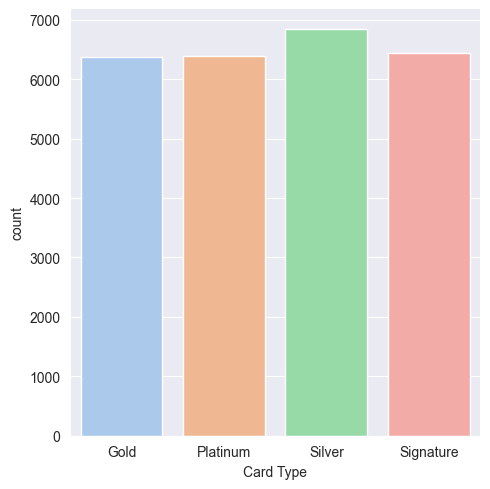

In [234]:
# card type distribution
sns.catplot(data=data, x="Card Type", kind="count", palette="pastel")
print(' ')
print('Silver: ', (data['Card Type'] == 'Silver').sum())
print('Gold: ', (data['Card Type'] == 'Gold').sum())
print('Platinum: ', (data['Card Type'] == 'Platinum').sum())
print('Signature: ', (data['Card Type'] == 'Signature').sum())
print(' ')

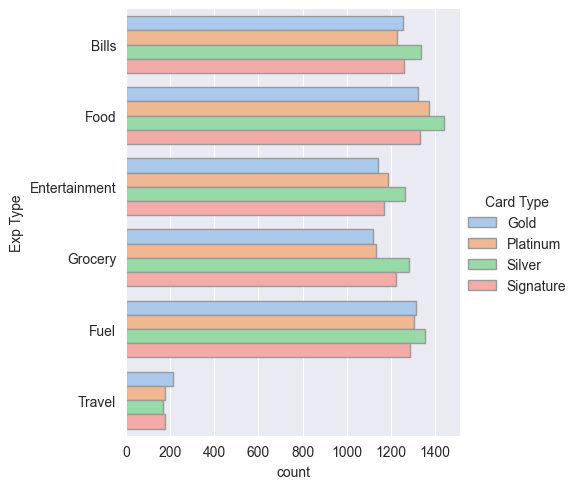

In [200]:
sns.catplot(
    data=data, y="Exp Type", hue="Card Type", kind="count",
    palette="pastel", edgecolor=".6",
)

In [235]:
# Gender vs 'Amount > 100000'
print("Number of females with an amount over 100000: ", ((data['Gender']=='F') & (data['Amount']>100000)).sum())
print("Number of males with an amount over 100000: ", ((data['Gender']=='M') & (data['Amount']>100000)).sum())

Number of females with an amount over 100000:  9267
Number of males with an amount over 100000:  8307


Female vs Bills:  2860
Female vs Food:  3012
Female vs Entertainment:  2384
Female vs Grocery:  2428
Female vs Fuel:  2617
Female vs Travel:  379
Male vs Bills :  2218
Male vs Food :  2451
Male vs Entertainment :  2378
Male vs Grocery :  2326
Male vs Fuel :  2640
Male vs Travel :  359


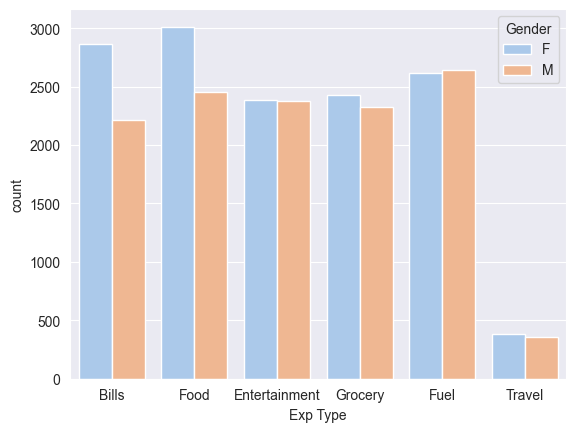

In [236]:
# Gender vs Exp Type
fig = sns.countplot(x=data['Exp Type'], hue=data['Gender'], palette='pastel')

print("Female vs Bills: ", ((data['Gender']=='F') & (data['Exp Type']=='Bills')).sum())
print("Female vs Food: ", ((data['Gender']=='F') & (data['Exp Type']=='Food')).sum())
print("Female vs Entertainment: ", ((data['Gender']=='F') & (data['Exp Type']=='Entertainment')).sum())
print("Female vs Grocery: ", ((data['Gender']=='F') & (data['Exp Type']=='Grocery')).sum())
print("Female vs Fuel: ", ((data['Gender']=='F') & (data['Exp Type']=='Fuel')).sum())
print("Female vs Travel: ", ((data['Gender']=='F') & (data['Exp Type']=='Travel')).sum())

print("Male vs Bills : ", ((data['Gender']=='M') & (data['Exp Type']=='Bills')).sum())
print("Male vs Food : ", ((data['Gender']=='M') & (data['Exp Type']=='Food')).sum())
print("Male vs Entertainment : ", ((data['Gender']=='M') & (data['Exp Type']=='Entertainment')).sum())
print("Male vs Grocery : ", ((data['Gender']=='M') & (data['Exp Type']=='Grocery')).sum())
print("Male vs Fuel : ", ((data['Gender']=='M') & (data['Exp Type']=='Fuel')).sum())
print("Male vs Travel : ", ((data['Gender']=='M') & (data['Exp Type']=='Travel')).sum())

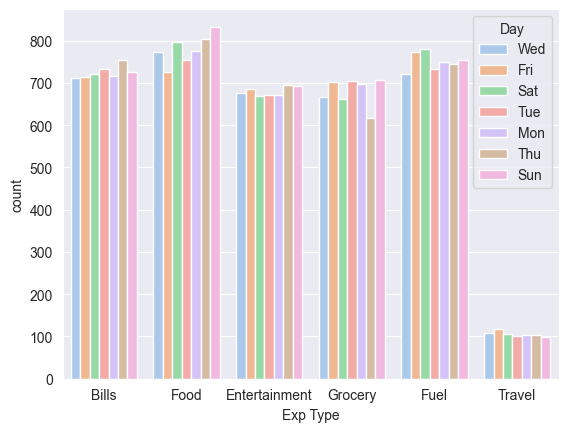

In [237]:
# Exp Type and Day distribution
fig = sns.countplot(x=data['Exp Type'], hue=data['Day'], palette='pastel')